In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')


In [4]:
df.shape

(11251, 15)

In [5]:
pd.DataFrame(df).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 966.9+ KB


In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['Amount']=df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#rename a column
df.rename(columns={'Marital_Status':'Shaadi'}) #it won't be saved because we didn't use inplace=True arguement

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
#if we want to use describe() on some specific columns 
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [16]:
# now we gonna start EDA

EXPLORATORY DATA  ANALYSIS


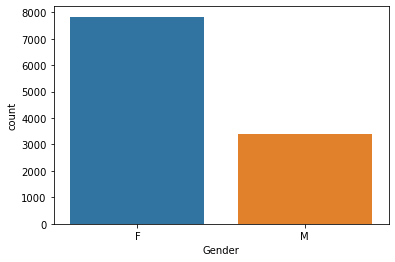

In [17]:
gen=sns.countplot(x='Gender',data= df)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

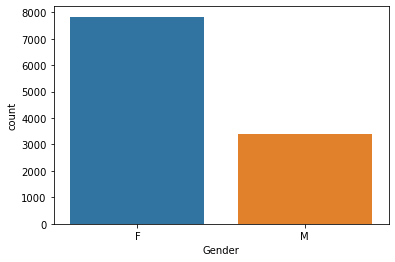

In [18]:
gen=sns.countplot(x='Gender',data= df)
for bars in gen.containers:
     gen.bar_label(bars)

In [ ]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [ ]:
sales_gen =df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From  the above graphs we can see that most of the buyers are females 
and even the purchasing power of females are greater than males

# AGE

In [ ]:
age=sns.countplot(data=df,x='Age Group',hue='Gender')

for p in age.patches:
    age.annotate(format(p.get_height(),'.of'),
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha='center',va ='center', xytext=(0,9),
                textcoords='offset points')
    

In [ ]:
sns.countplot(data=df,x='Age Group',hue='Gender') #hue will create division of males & females in age group

In [ ]:
sales_age =df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

In [ ]:
#34:08
sns.color_palette("pastel")

from above graph we see that most of the buyers are in age group of 26-35 yrs female

# STATE

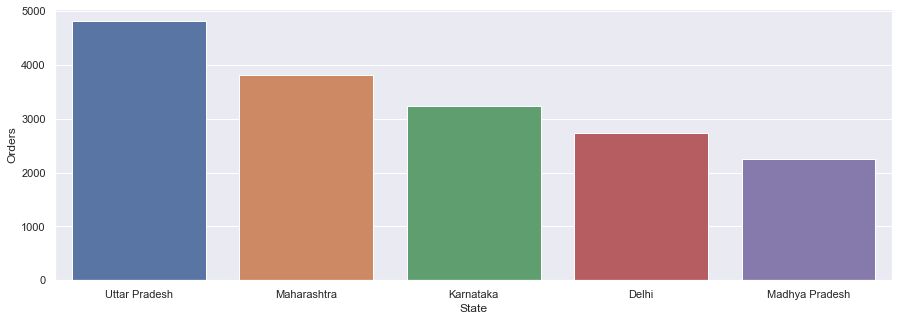

In [19]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

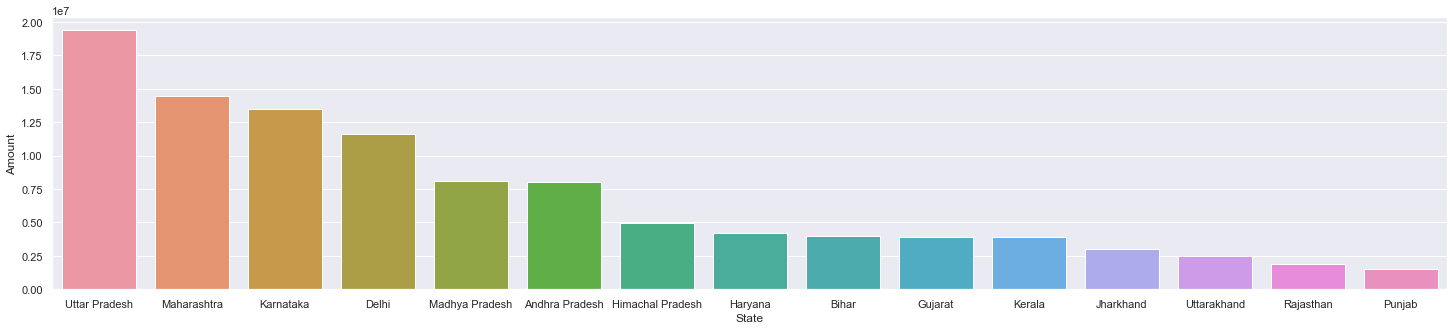

In [24]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

*so we can see in the above graph that UP ,Maharashtra,Karnataka are top three ordered state and the most amount spending also*

# MARITAL STATUS

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

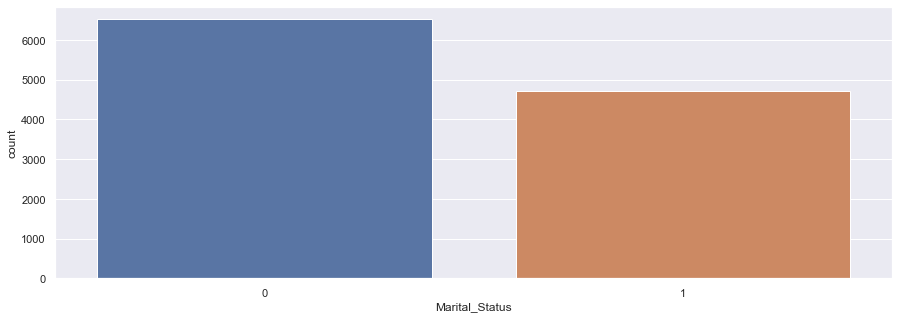

In [31]:
marital=sns.countplot(x='Marital_Status',data= df)
sns.set(rc={'figure.figsize':(7,5)})
for bars in marital.containers:
    marital.bar_label(bars)

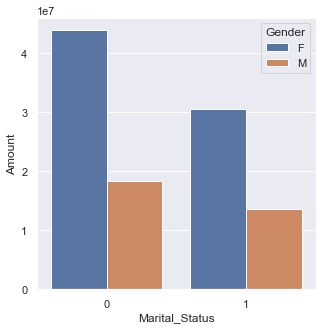

In [32]:
sales_marital=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_marital,x='Marital_Status',y='Amount',hue='Gender')

*From the above graph we can see that most of the buyers are married (females) and they have high purchasing power also*

# OCCUPATION

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

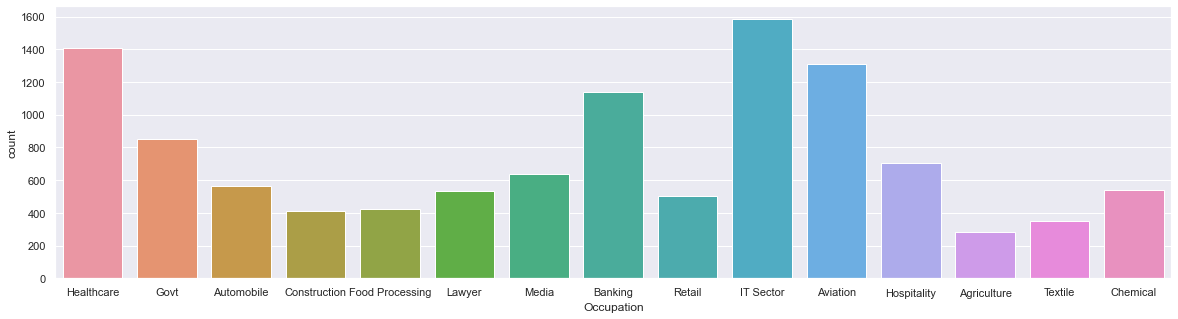

In [35]:
occu=sns.countplot(x='Occupation',data= df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in occu.containers:
    occu.bar_label(bars)

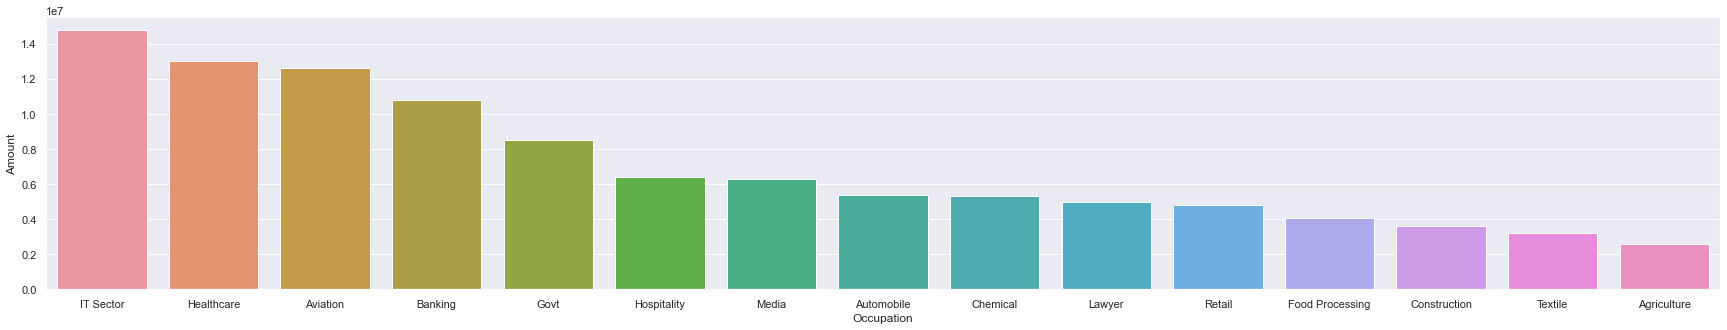

In [39]:
sales_occu=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_occu,x='Occupation',y='Amount')

# PRODUCT CATEGORY

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

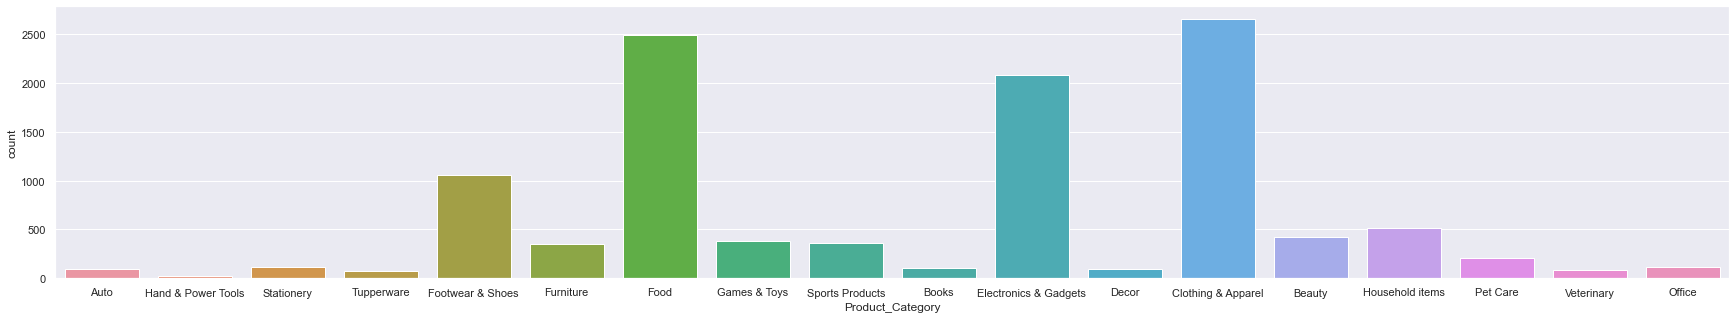

In [40]:
pro=sns.countplot(x='Product_Category',data= df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in pro.containers:
    pro.bar_label(bars)

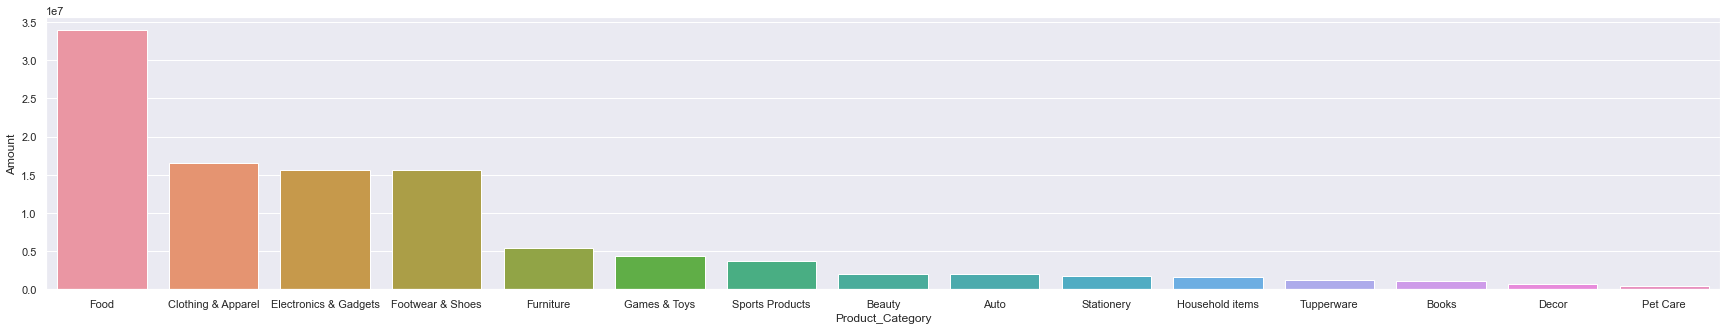

In [44]:
sales_pro=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_pro,x='Product_Category',y='Amount')

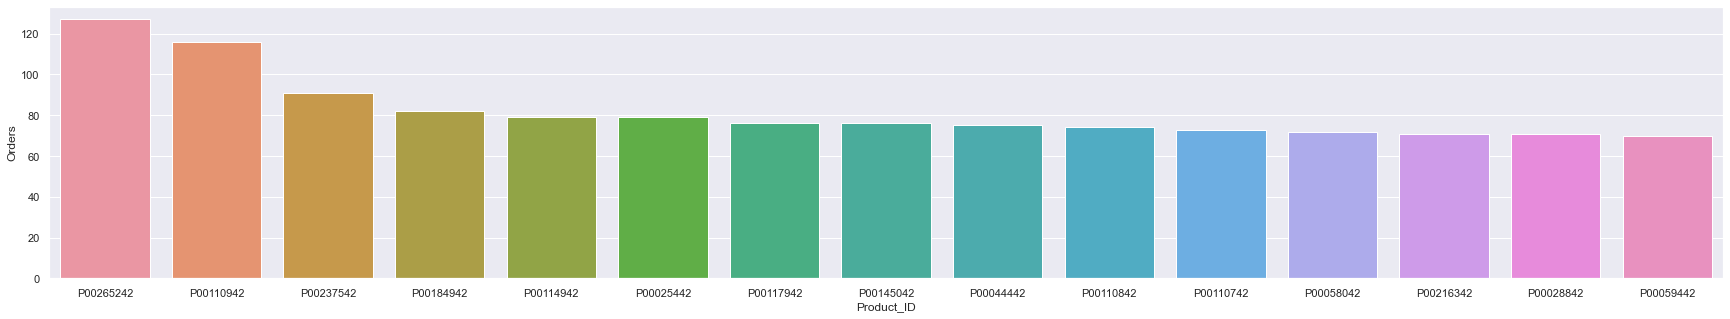

In [45]:
sales_pro_id=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(15)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_pro_id,x='Product_ID',y='Orders')

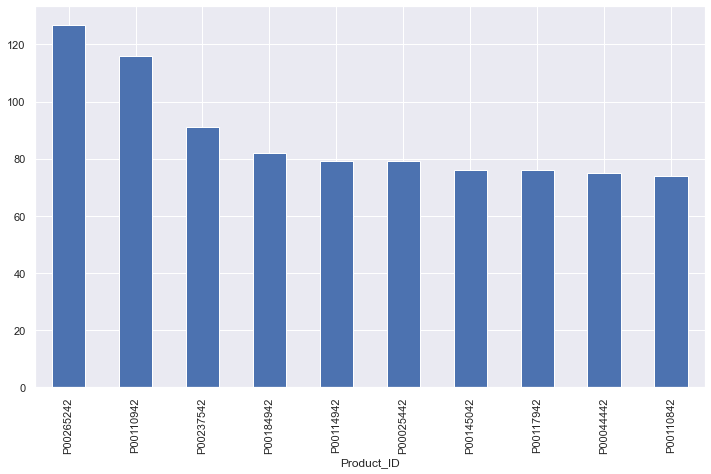

In [46]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# CONCLUSION

*Married women age group 26-35 yrs from UP,Maharashtra & Karnataka working in IT,Health Care & Aviation are more likely to
buy a product from Food,Clothing and Electronics category*